In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Grand/Desktop/DS-Academy/Diamonds/1/diamonds.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df["ratio"] = df.x / df.y

In [8]:
df.corr

<bound method DataFrame.corr of        carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
6       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47   
7       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53   
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49   
9       0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39   
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73   
11      

In [9]:
#Correlation Matrix
#Plotting the correlation matrix to see what features are highly correlated

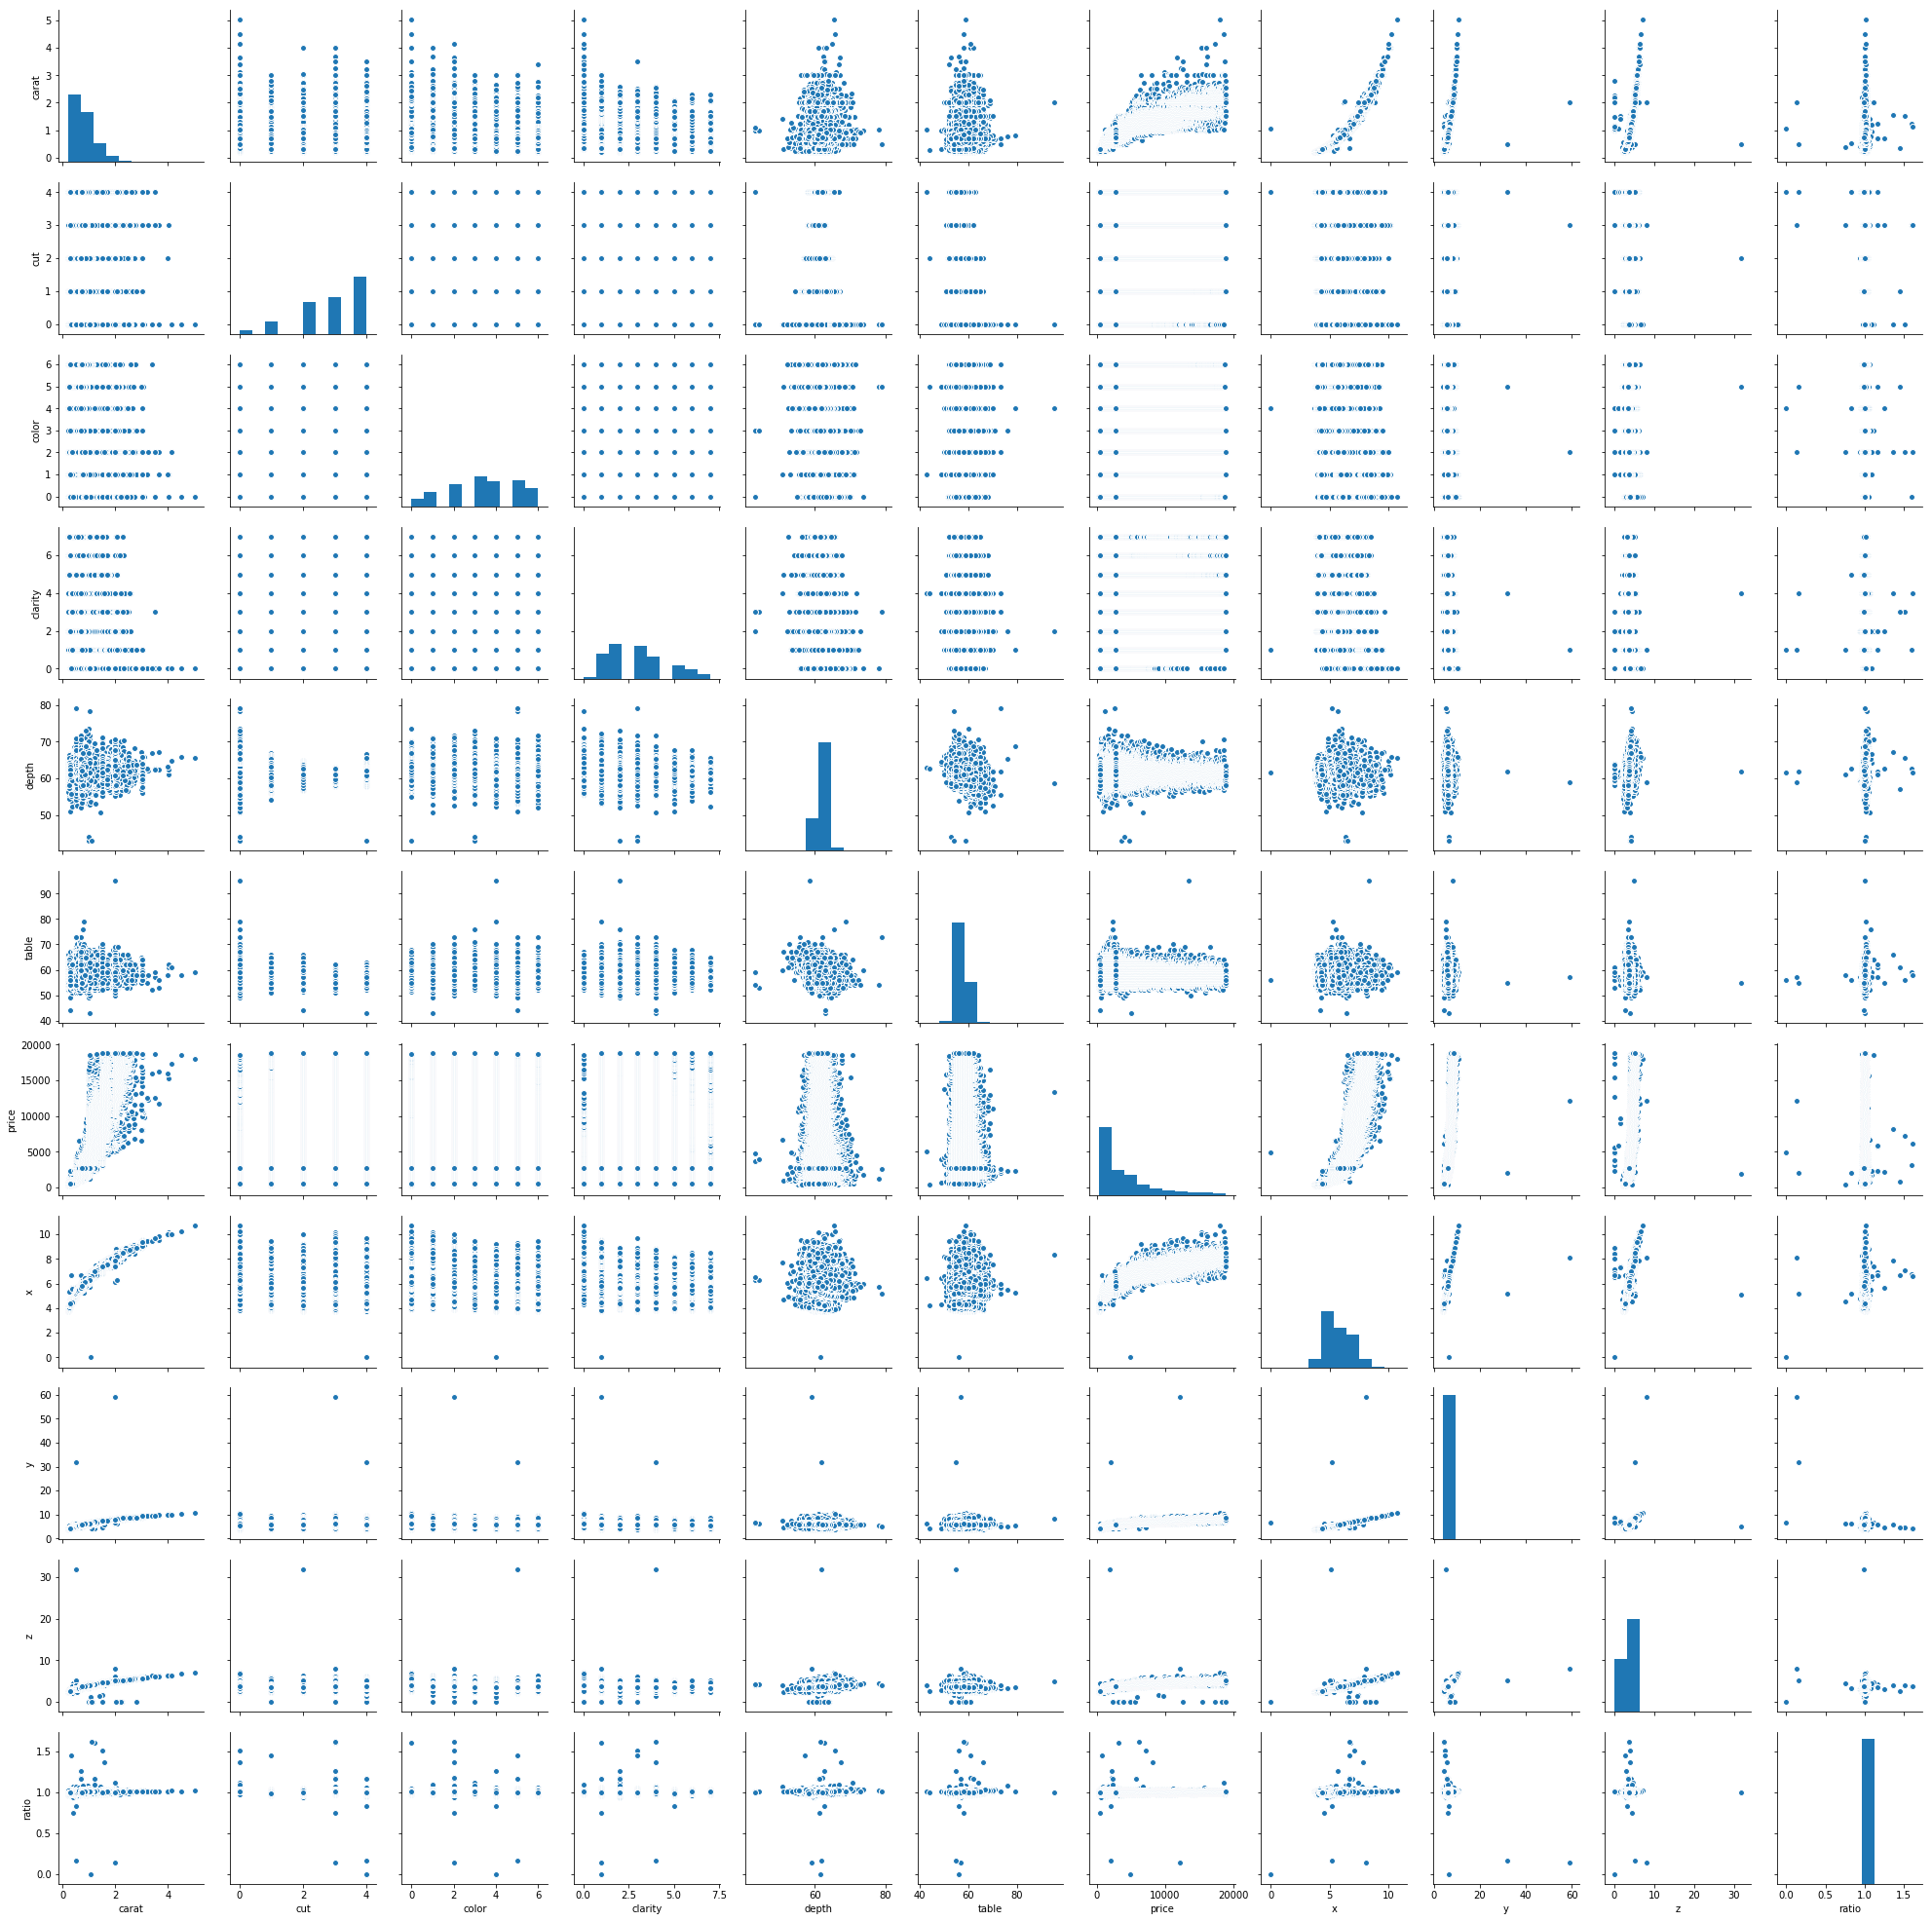

In [35]:
sns.pairplot(df)

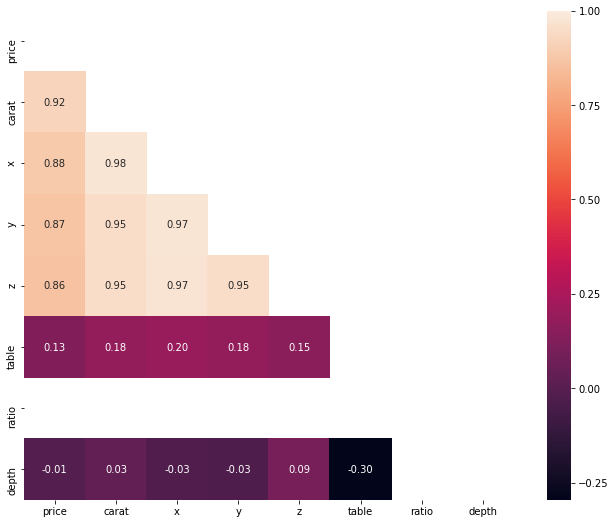

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(cm, vmax=1, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
df.replace({ 'cut': {'Ideal':4 , 'Premium':3 , 'Very Good':2 , 'Good':1 , 'Fair' : 0} , 'color' : {'J': 0 , 'I': 1,'H':2,'G':3,'F':4,'E':5,'D':6}} ,inplace=True)

In [12]:
df=df.replace({'clarity': {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}})

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
#LINEAR REGRE

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = df.drop(['price'],1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.intercept_)

7943.169615666713


In [18]:
regression_model.coef_

array([11016.61306436,   128.87212813,   322.83990231,   499.85233865,
         -77.62228407,   -21.47913255,  -851.14001808,   -81.6245975 ,
         -38.75350335, -4288.56392227])

In [19]:
predictions = regression_model.predict(X_test)

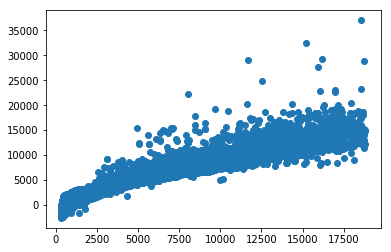

In [20]:
plt.scatter(y_test,predictions)

In [21]:
from sklearn import metrics

In [22]:
metrics.mean_absolute_error(y_test,predictions)

798.7489966211896

In [23]:
metrics.mean_squared_error(y_test,predictions)

1472401.4844619953

In [24]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1213.4255166519267

In [25]:
regression_model.score(X_test, y_test)

0.9065314944884273

In [26]:
#Ridge Regression

In [27]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\sit

C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Grand\Anaconda3\lib\sit

0.005

In [28]:
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

1476566.3351580005

In [29]:
ridge.fit(X, y)
pd.Series(ridge.coef_, index=X.columns)

carat      9607.297509
cut         125.760586
color       312.666351
clarity     500.726268
depth       -51.790895
table       -20.665074
x          -234.196291
y           -96.930658
z           -82.776955
ratio     -5021.009294
dtype: float64

In [30]:
ridge.score(X_test, y_test)

0.9062135612893808

In [31]:
#Lasso

In [32]:
lasso = Lasso(max_iter=10000, normalize=True)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

1470279.6304674575

In [33]:
pd.Series(lasso.coef_, index=X.columns)

carat      10612.772858
cut          129.010490
color        318.439537
clarity      500.444509
depth        -66.922928
table        -18.809713
x           -688.238571
y            -73.928057
z            -42.908924
ratio      -4205.571275
dtype: float64

In [34]:
lasso.score(X_test, y_test)

0.9066661904418585

In [36]:
import statsmodels.api as sm

In [37]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'ratio'],
      dtype='object')

In [38]:
model = sm.OLS.from_formula('price ~ ' + '+'.join(df.columns.difference(['price'])), df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.272e+04
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        06:11:22   Log-Likelihood:            -4.5959e+05
No. Observations:               53933   AIC:                         9.192e+05
Df Residuals:                   53922   BIC:                         9.193e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6907.8982    633.859     10.898      0.0